In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Retail_Expansion_Project/Dataset/Superstore_Cleaned.csv" ,encoding='latin -1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7773,CA-2016-108196,11/25/2016,12-02-2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.99,5,0.7,-6599.9780
1,684,US-2017-168116,11-04-2017,11-04-2017,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.98,4,0.5,-3839.9904
2,9775,CA-2014-169019,7/26/2014,7/30/2014,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,78207,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.58,8,0.8,-3701.8928
3,3012,CA-2017-134845,4/17/2017,4/23/2017,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,80027,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.99,5,0.7,-3399.9800
4,4992,US-2017-122714,12-07-2017,12/13/2017,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,60653,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.99,5,0.8,-2929.4845


In [3]:
df.shape

(9994, 21)

In [4]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858022,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245131,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.440000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Converting orderdate,shipdate to datetime

In [7]:
df['Order Date'].astype('datetime64[ms, UTC]')

0      2016-11-25 00:00:00+00:00
1      2017-11-04 00:00:00+00:00
2      2014-07-26 00:00:00+00:00
3      2017-04-17 00:00:00+00:00
4      2017-12-07 00:00:00+00:00
                  ...           
9989   2014-09-23 00:00:00+00:00
9990   2016-12-17 00:00:00+00:00
9991   2017-11-17 00:00:00+00:00
9992   2017-03-23 00:00:00+00:00
9993   2016-10-02 00:00:00+00:00
Name: Order Date, Length: 9994, dtype: datetime64[ms, UTC]

In [8]:
df['Ship Date'].astype('datetime64[ms, UTC]')

0      2016-12-02 00:00:00+00:00
1      2017-11-04 00:00:00+00:00
2      2014-07-30 00:00:00+00:00
3      2017-04-23 00:00:00+00:00
4      2017-12-13 00:00:00+00:00
                  ...           
9989   2014-09-28 00:00:00+00:00
9990   2016-12-21 00:00:00+00:00
9991   2017-11-22 00:00:00+00:00
9992   2017-03-25 00:00:00+00:00
9993   2016-10-09 00:00:00+00:00
Name: Ship Date, Length: 9994, dtype: datetime64[ms, UTC]

EXTRACTING MONTH

In [9]:

df['Order Date'] = df['Order Date'].str.replace('-', '/')

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

In [11]:
df['Order Date'].isnull().sum()

np.int64(0)

In [12]:
df['Month'] = df['Order Date'].dt.month
df['Month']

0       11
1       11
2        7
3        4
4       12
        ..
9989     9
9990    12
9991    11
9992     3
9993    10
Name: Month, Length: 9994, dtype: int32

In [13]:
df['Month Name'] = df['Order Date'].dt.month_name()
df['Month Name']

0        November
1        November
2            July
3           April
4        December
          ...    
9989    September
9990     December
9991     November
9992        March
9993      October
Name: Month Name, Length: 9994, dtype: object

EXTRACTING YEAR

In [14]:
df['Year'] = df['Order Date'].dt.year
df['Year']

0       2016
1       2017
2       2014
3       2017
4       2017
        ... 
9989    2014
9990    2016
9991    2017
9992    2017
9993    2016
Name: Year, Length: 9994, dtype: int32

CHECKING UNIQUE YEARS

In [15]:
df['Year'].unique()

array([2016, 2017, 2014, 2015], dtype=int32)

calculating total sales by year

In [16]:
total_sales = df.groupby('Year')['Sales'].sum()
total_sales

Year
2014    484247.56
2015    470532.46
2016    609205.86
2017    733215.19
Name: Sales, dtype: float64

calculating total profit by year

In [17]:
total_profit = df.groupby('Year')['Profit'].sum()
total_profit

Year
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: Profit, dtype: float64

Calculating growth %

In [18]:
total_sales.pct_change() * 100

Year
2014          NaN
2015    -2.832250
2016    29.471591
2017    20.355899
Name: Sales, dtype: float64

Calculating total sales per month

In [19]:
sales_month = df.groupby('Month')['Sales'].sum()
sales_month

Month
1      94924.87
2      59751.26
3     205005.51
4     137762.16
5     155028.83
6     152718.72
7     147238.11
8     159043.99
9     307649.96
10    200323.03
11    352461.09
12    325293.54
Name: Sales, dtype: float64

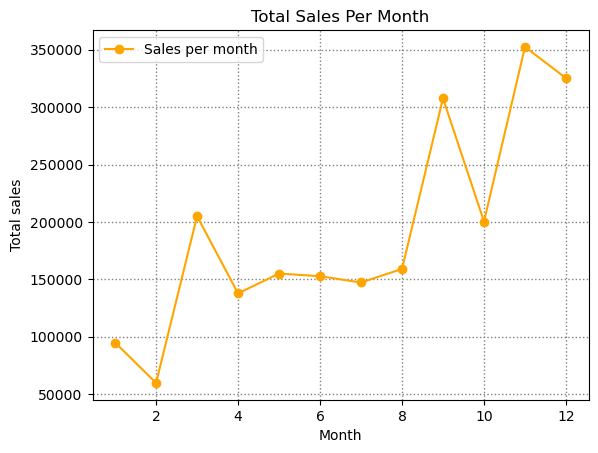

In [20]:
plt.plot(sales_month,color='orange',label='Sales per month',marker = 'o')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.title('Total Sales Per Month')
plt.legend(loc = 'upper left')
plt.grid(color = 'gray',linestyle = ':',linewidth = 1)
plt.show()

Calculating total profit per month

In [21]:
profit_month = df.groupby('Month')['Profit'].sum()
profit_month

Month
1      9134.4461
2     10294.6107
3     28594.6872
4     11587.4363
5     22411.3078
6     21285.7954
7     13832.6648
8     21776.9384
9     36857.4753
10    31784.0413
11    35468.4265
12    43369.1919
Name: Profit, dtype: float64

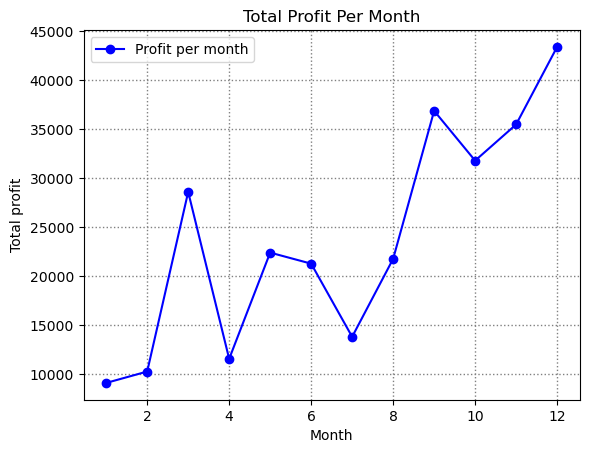

In [22]:
plt.plot(profit_month,color='blue',label='Profit per month',marker = 'o')
plt.xlabel('Month')
plt.ylabel('Total profit')
plt.title('Total Profit Per Month')
plt.legend(loc = 'upper left')
plt.grid(color = 'gray',linestyle = ':',linewidth = 1)
plt.show()

Year-Month Trend

In [23]:
pivot_table = df.groupby(['Year','Month'])['Sales'].sum().unstack()
pivot_table

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2014,14236.90,4519.92,55691.04,28295.35,23648.28,34595.14,33946.37,27909.47,81777.34,31453.37,78628.74,69545.64
2015,18174.08,11951.40,38726.26,34195.25,30131.72,24797.31,28765.32,36898.32,64595.87,31404.90,75972.51,74919.52
2016,18542.52,22978.82,51715.86,38750.04,56987.75,40344.54,39261.99,31115.35,73410.09,59687.80,79412.03,96999.07
2017,43971.37,20301.12,58872.35,36521.52,44261.08,52981.73,45264.43,63120.85,87866.66,77776.96,118447.81,83829.31


In [24]:
pivot_table.shape

(4, 12)

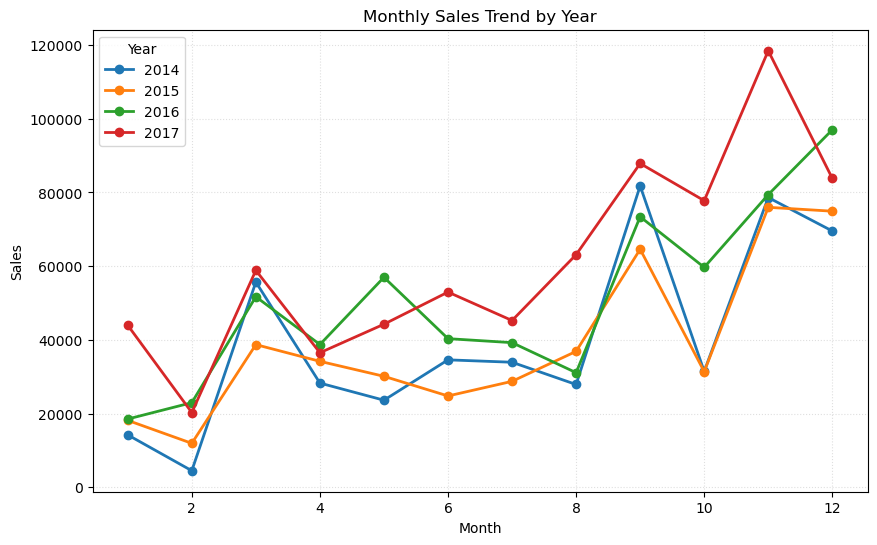

In [25]:


pivot_table = df.pivot_table(
    values='Sales',
    index='Month',      # Month on X-axis
    columns='Year',     # Year as lines
    aggfunc='sum'
)

pivot_table = pivot_table.sort_index()
pivot_table.plot(figsize=(10,6), marker='o', linewidth=2)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend by Year")
plt.grid(linestyle=":", alpha=0.4)
plt.show()

Total sales by region

In [26]:
sales_region = df.groupby('Region')['Sales'].sum()
sales_region

Region
Central    501239.88
East       678781.36
South      391721.90
West       725457.93
Name: Sales, dtype: float64

<Figure size 1000x600 with 0 Axes>

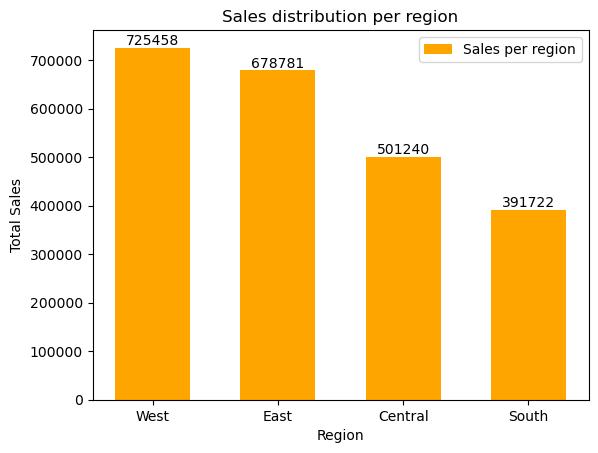

In [27]:
sales_region = sales_region.sort_values(ascending= False)
plt.Figure(figsize=(10,6))
bars= plt.bar(sales_region.index,sales_region.values,color = 'orange',width= 0.6,label='Sales per region')
plt.bar_label(bars, fmt='%.0f')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(loc = 'upper right')
plt.title('Sales distribution per region')
plt.Figure(figsize=(10,6))

Total profit by region

In [28]:
profit_region = df.groupby('Region')['Profit'].sum()
profit_region

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

<Figure size 1000x600 with 0 Axes>

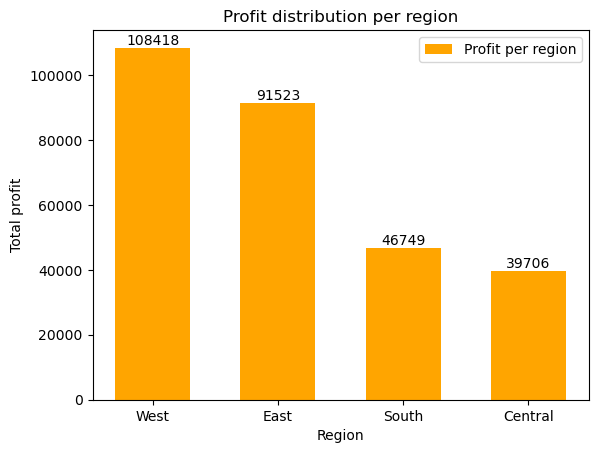

In [29]:
profit_region = profit_region.sort_values(ascending= False)
plt.Figure(figsize=(10,6))
bars= plt.bar(profit_region.index,profit_region.values,color = 'orange',width= 0.6,label='Profit per region')
plt.bar_label(bars, fmt='%.0f')
plt.xlabel('Region')
plt.ylabel('Total profit')
plt.legend(loc = 'upper right')
plt.title('Profit distribution per region')
plt.Figure(figsize=(10,6))

Profit per Region + Margin

In [30]:
profit_margin = df['Profit']/df['Sales']*100
profit_margin

0      -146.666504
1       -48.000000
2      -170.000312
3      -133.333072
4      -155.000000
           ...    
9989     49.000000
9990     50.000000
9991     48.000000
9992     48.000000
9993     48.000000
Length: 9994, dtype: float64

In [31]:
region_summary = df.groupby('Region')[['Sales','Profit']].sum()
region_summary['Profit Margin %'] = (
    region_summary['Profit'] / region_summary['Sales']
) * 100
region_summary

,Sales,Profit,Profit Margin %
Region,,,
Central,501239.88,39706.3625,7.921629
East,678781.36,91522.7800,13.483396
South,391721.90,46749.4303,11.934342
West,725457.93,108418.4489,14.944829


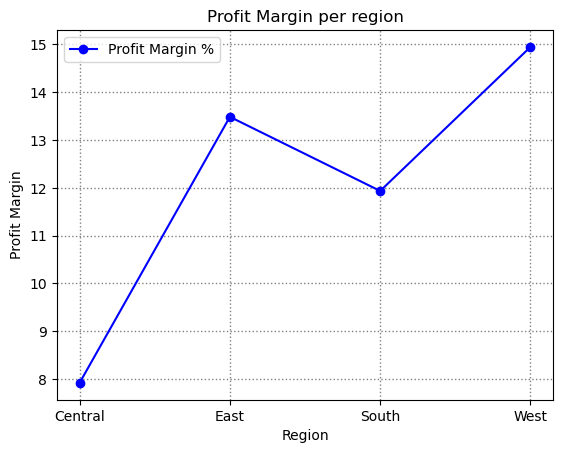

In [32]:
plt.plot(
    region_summary.index,
    region_summary['Profit Margin %'],
    marker='o',
    color='blue',
    label='Profit Margin %'
)
plt.xlabel('Region')
plt.ylabel('Profit Margin')
plt.title('Profit Margin per region')
plt.grid(color = 'gray',linestyle =':',linewidth=1)
plt.legend()
plt.show()

Top 5 states by sale

In [33]:
statewise_sales = df.groupby('State')['Sales'].sum()
statewise_sales.head()

State
Alabama        19510.64
Arizona        35282.02
Arkansas       11678.13
California    457687.68
Colorado       32108.12
Name: Sales, dtype: float64

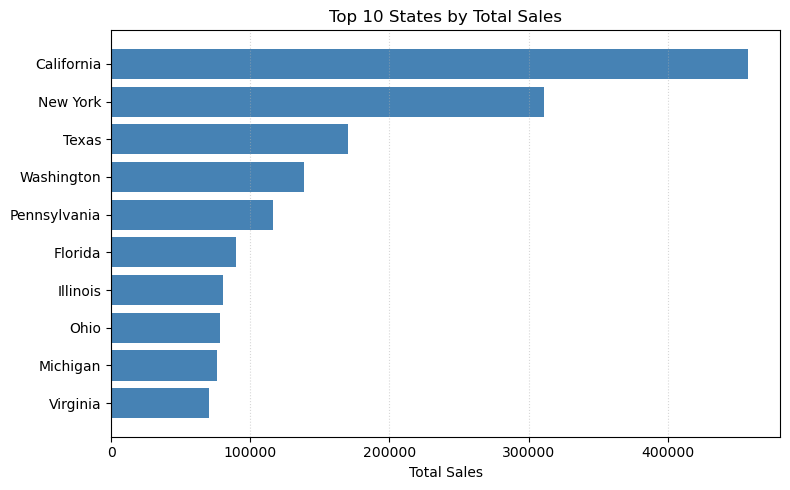

In [34]:

top_10states = statewise_sales.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))

plt.barh(top_10states.index,
         top_10states.values,
         color='steelblue')

plt.xlabel("Total Sales")
plt.title("Top 10 States by Total Sales")

plt.gca().invert_yaxis()   # highest
 
plt.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

In [35]:
citywise_summary = df.groupby('City')[['Sales','Profit']].sum()
citywise_summary.head(10)



,Sales,Profit
City,,
Aberdeen,25.50,6.6300
Abilene,1.39,-3.7584
Akron,2729.99,-186.6356
Albuquerque,2220.17,634.0881
Alexandria,5519.57,318.6183
Allen,290.21,-39.8775
Allentown,853.26,-226.4504
Altoona,20.45,-1.1835
Amarillo,3773.06,-387.9683


In [36]:
citywise_summary.sort_values(by= 'Sales',ascending=False)
citywise_summary.head(10)

,Sales,Profit
City,,
Aberdeen,25.50,6.6300
Abilene,1.39,-3.7584
Akron,2729.99,-186.6356
Albuquerque,2220.17,634.0881
Alexandria,5519.57,318.6183
Allen,290.21,-39.8775
Allentown,853.26,-226.4504
Altoona,20.45,-1.1835
Amarillo,3773.06,-387.9683


In [37]:
citywise_summary[
    citywise_summary['Profit'] < 0
].sort_values(by='Profit').head(10)

,Sales,Profit
City,,
Philadelphia,109077.09,-13837.7674
Houston,64504.71,-10153.5485
San Antonio,21843.54,-7299.0502
Lancaster,9891.48,-7239.0684
Chicago,48539.59,-6654.5688
Burlington,21668.08,-3622.8772
Dallas,20131.90,-2846.5257
Phoenix,11000.27,-2790.8832
Aurora,11656.47,-2691.7386


Checking correlation b/w discount and profit

          Discount    Profit
Discount  1.000000 -0.219487
Profit   -0.219487  1.000000


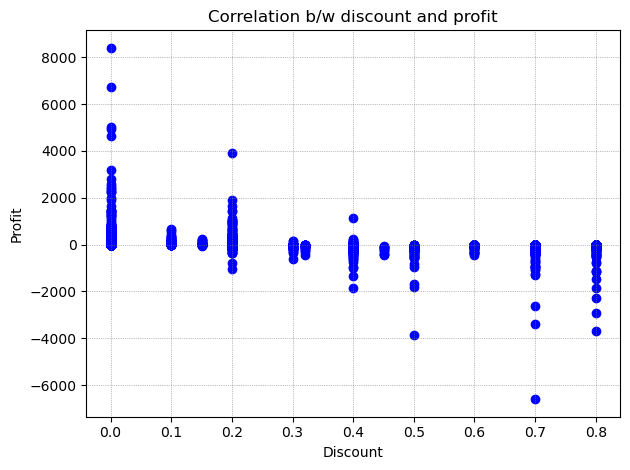

In [38]:
corr_value = df[['Discount','Profit']].corr()
print(corr_value)
plt.scatter(df['Discount'],df['Profit'],marker='o',color = 'blue')
plt.title('Correlation b/w discount and profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(linestyle =':',linewidth=0.5,color='gray')
plt.tight_layout()
plt.show()

In [40]:
df.to_excel("retail_cleaned.xlsx", index=False)

High discounts are negatively correlated with profit.
West region performs strongest in sales and margin.
Certain cities consistently generate losses.”